# 🛠️ Engine Vibration Analysis Project

Welcome to the **Engine Vibration Analysis** dataset! This project is designed for **binary classification** tasks in Machine Learning. 

## 📝 Story Behind the Data

Industrial engines are equipped with multiple sensors measuring temperature, pressure, voltage, and other operational parameters. The dataset contains **458 samples** with **59 sensor readings** for each engine instance. Each row represents a single snapshot of an engine's operational state.

Instead of detailing every sensor (because there are **so many! 😅**), we focus on the **ultimate goal**:

### 🎯 Target Column: `Vibration_Intensity`
- `0` → Engine is operating **normally** ✅
- `1` → Engine is experiencing **dangerous vibration levels** ⚠️

In [11]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , cross_val_score , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
data = pd.read_csv('engine_vibration_data.csv')
pd.set_option('display.max_columns', 6)           # Limit the display to 6 columns for cleaner output
print(data.head(5).round(2),'\n')                 # Display the first 5 rows of the dataset
print(data.shape,'\n')                            # Display the number of rows and columns in the dataset
print(data.groupby('Vibration_Intensity').size()) # Grouping data by target to check distribution

   Sensor_1  Sensor_2  Sensor_3  ...  Sensor_58  Sensor_59  \
0      0.95     -0.61      0.82  ...      -0.67      -0.52   
1      1.41     -1.28     -0.07  ...      -0.39      -0.65   
2      2.03      1.75      0.50  ...       1.07       0.00   
3      3.36     -0.71      2.51  ...       2.87       0.13   
4     -3.42      0.16     -0.58  ...       1.10       0.18   

   Vibration_Intensity  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 60 columns] 

(458, 60) 

Vibration_Intensity
0    225
1    233
dtype: int64


# 📊 Data Visualization

In this section, we explore the **Engine Vibration dataset** through various plots to better understand the distributions, relationships, and potential patterns in the data. Visualizations help us spot anomalies, trends, and correlations before feeding the data into a model. 🚀

## 📈 Histogram
Histograms give us a quick look at the **distribution of individual sensor readings** and the target variable (`Vibration_Intensity`). They help identify skewed data or unusual spikes.

## 📉 Density Plot
Density plots are smooth versions of histograms. They show the **probability density** of sensor values and make it easier to compare multiple distributions.

## 📦 Boxplot
Boxplots summarize the **spread and outliers** for each sensor. Useful for spotting extreme readings that might affect the model. 📦⚠️

## 🔥 Heatmap
Heatmaps show the **correlation matrix** between all features and the target. Great for spotting relationships and highly correlated sensors. 🔥

> Tip: Always visualize before modeling! It makes your dataset less of a mystery and more of a roadmap. 🗺️

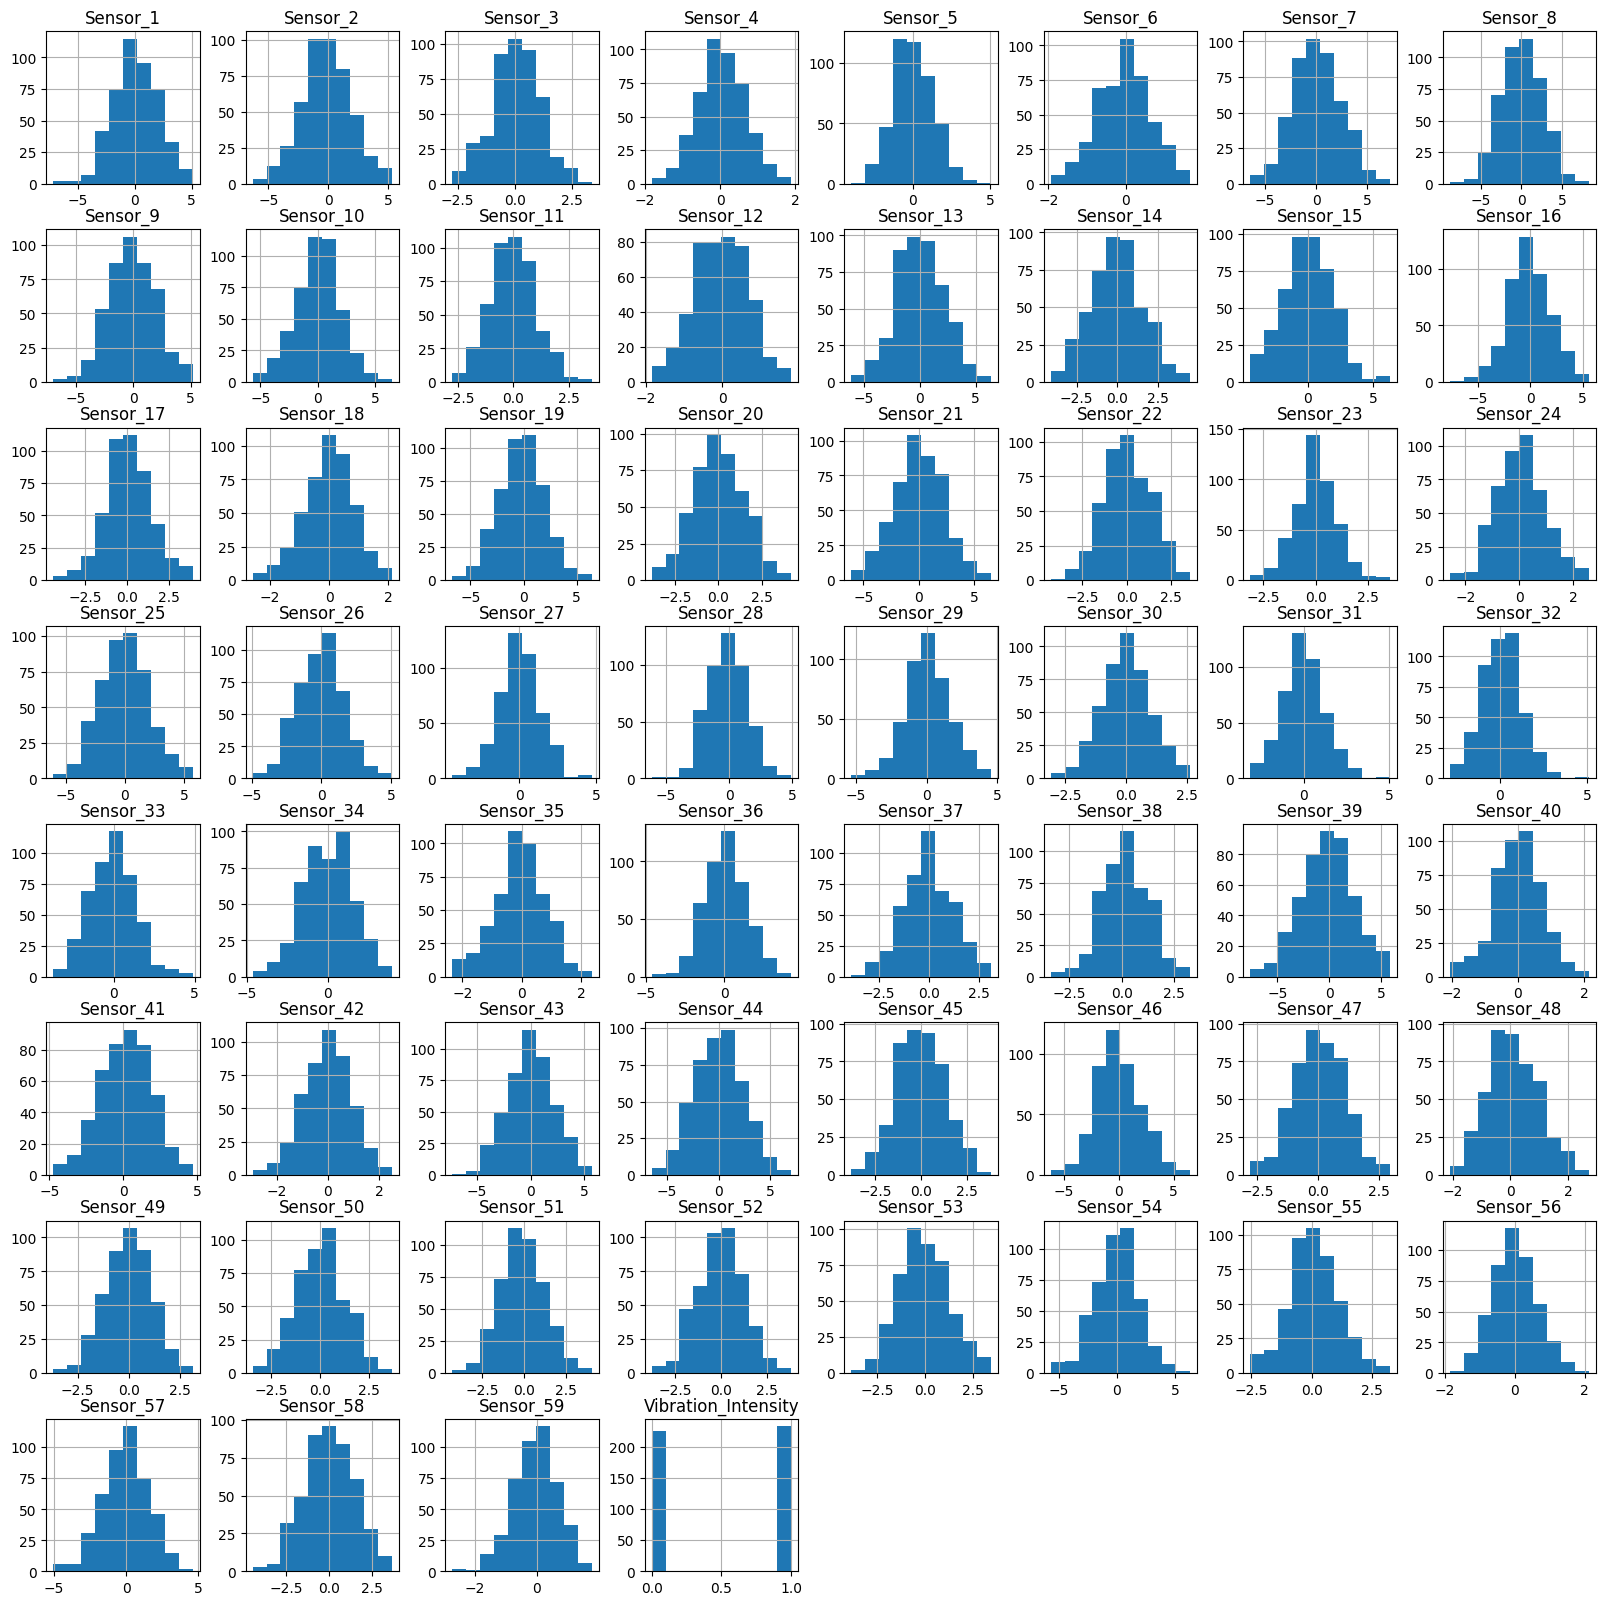

In [3]:
# Histogram
data.hist(figsize=(20,20))
plt.show()

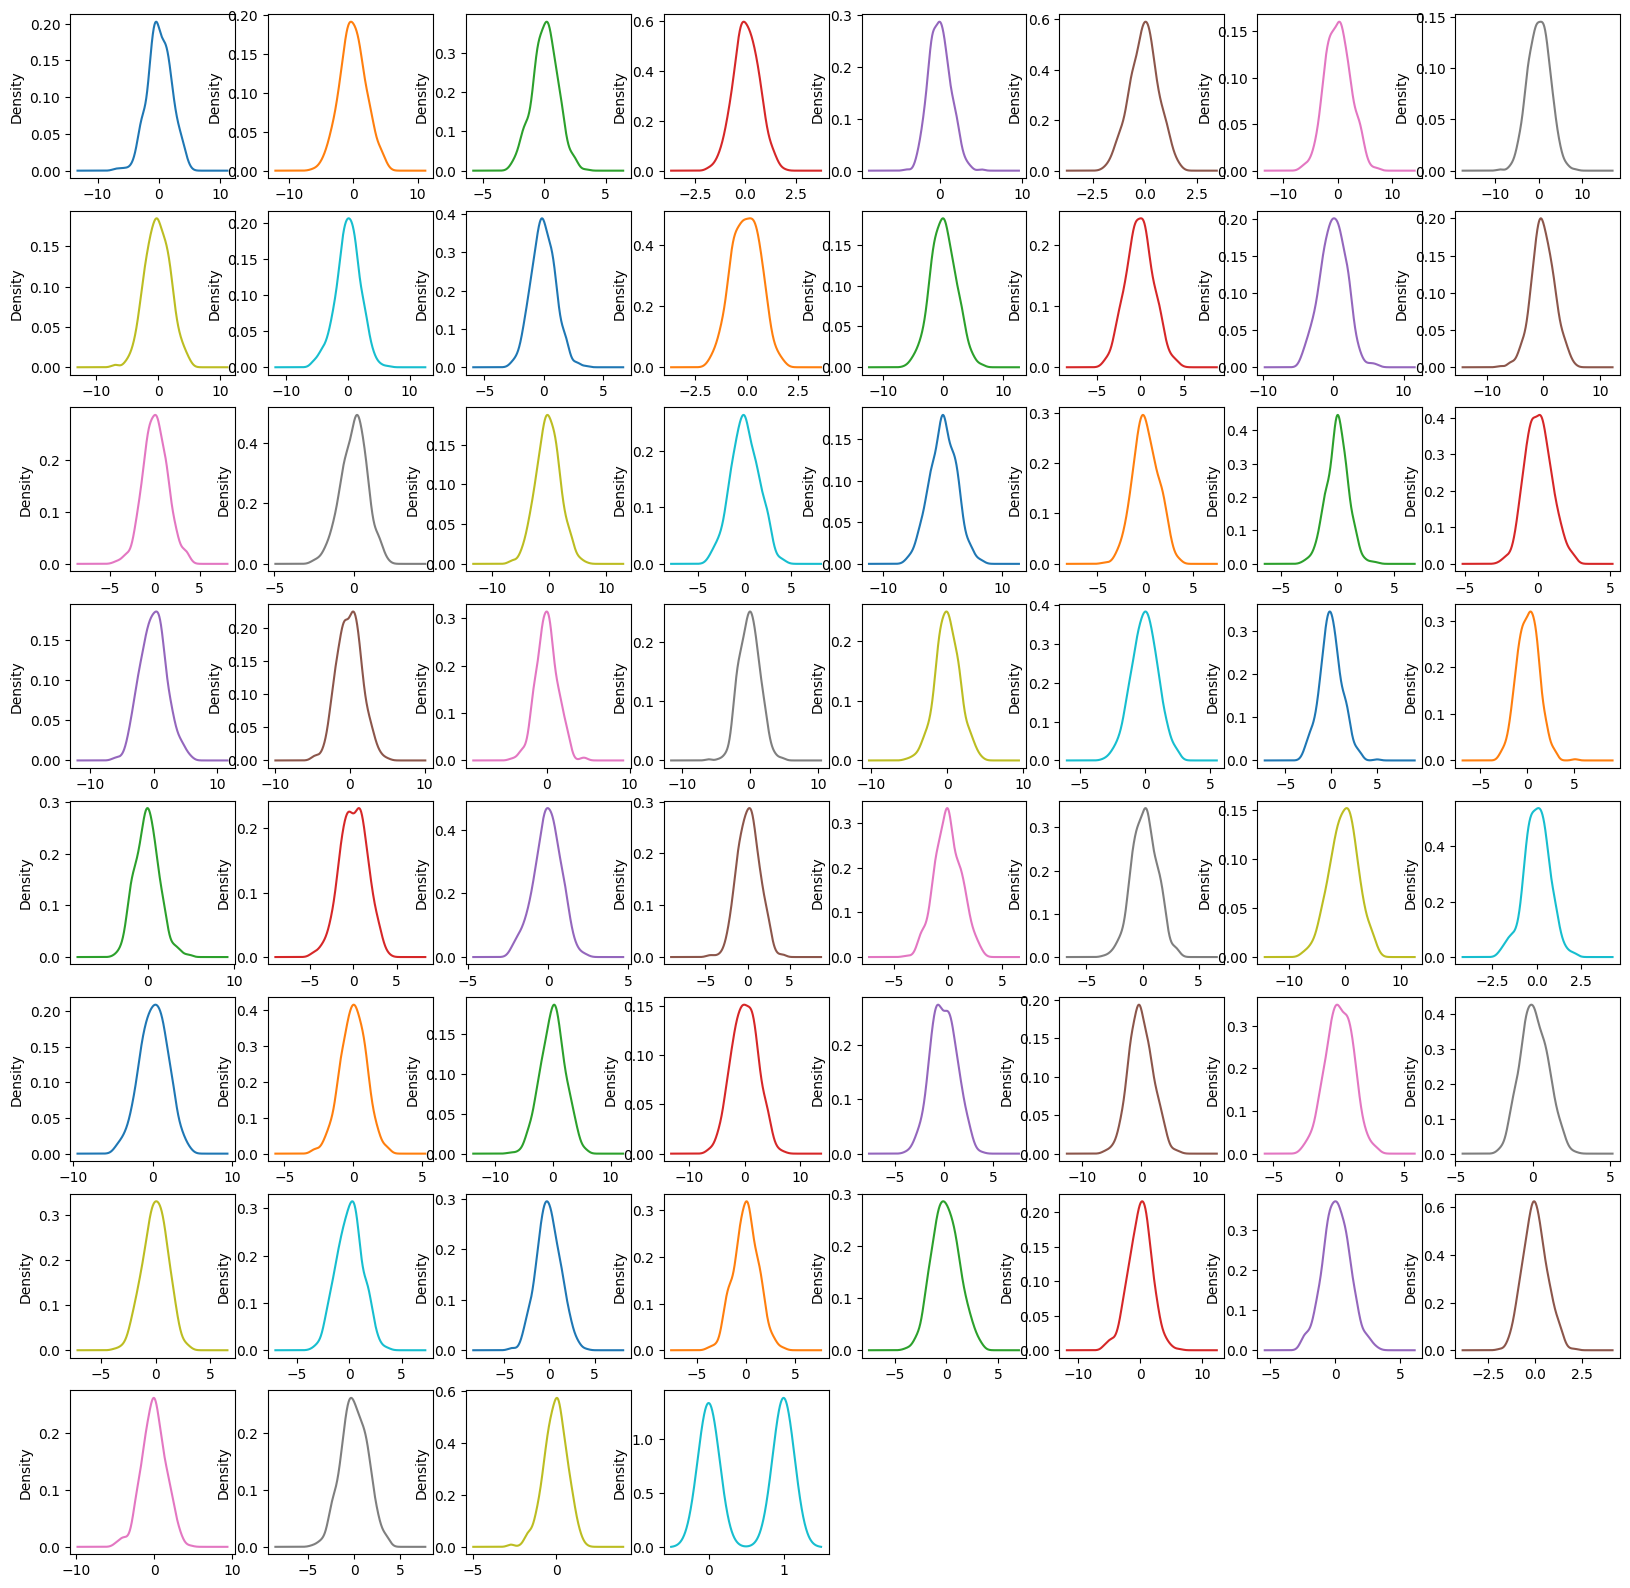

In [4]:
# Density
data.plot(kind='density',subplots=True,layout=(8,8),sharex=False,figsize=(20,20),legend=False)
plt.show()

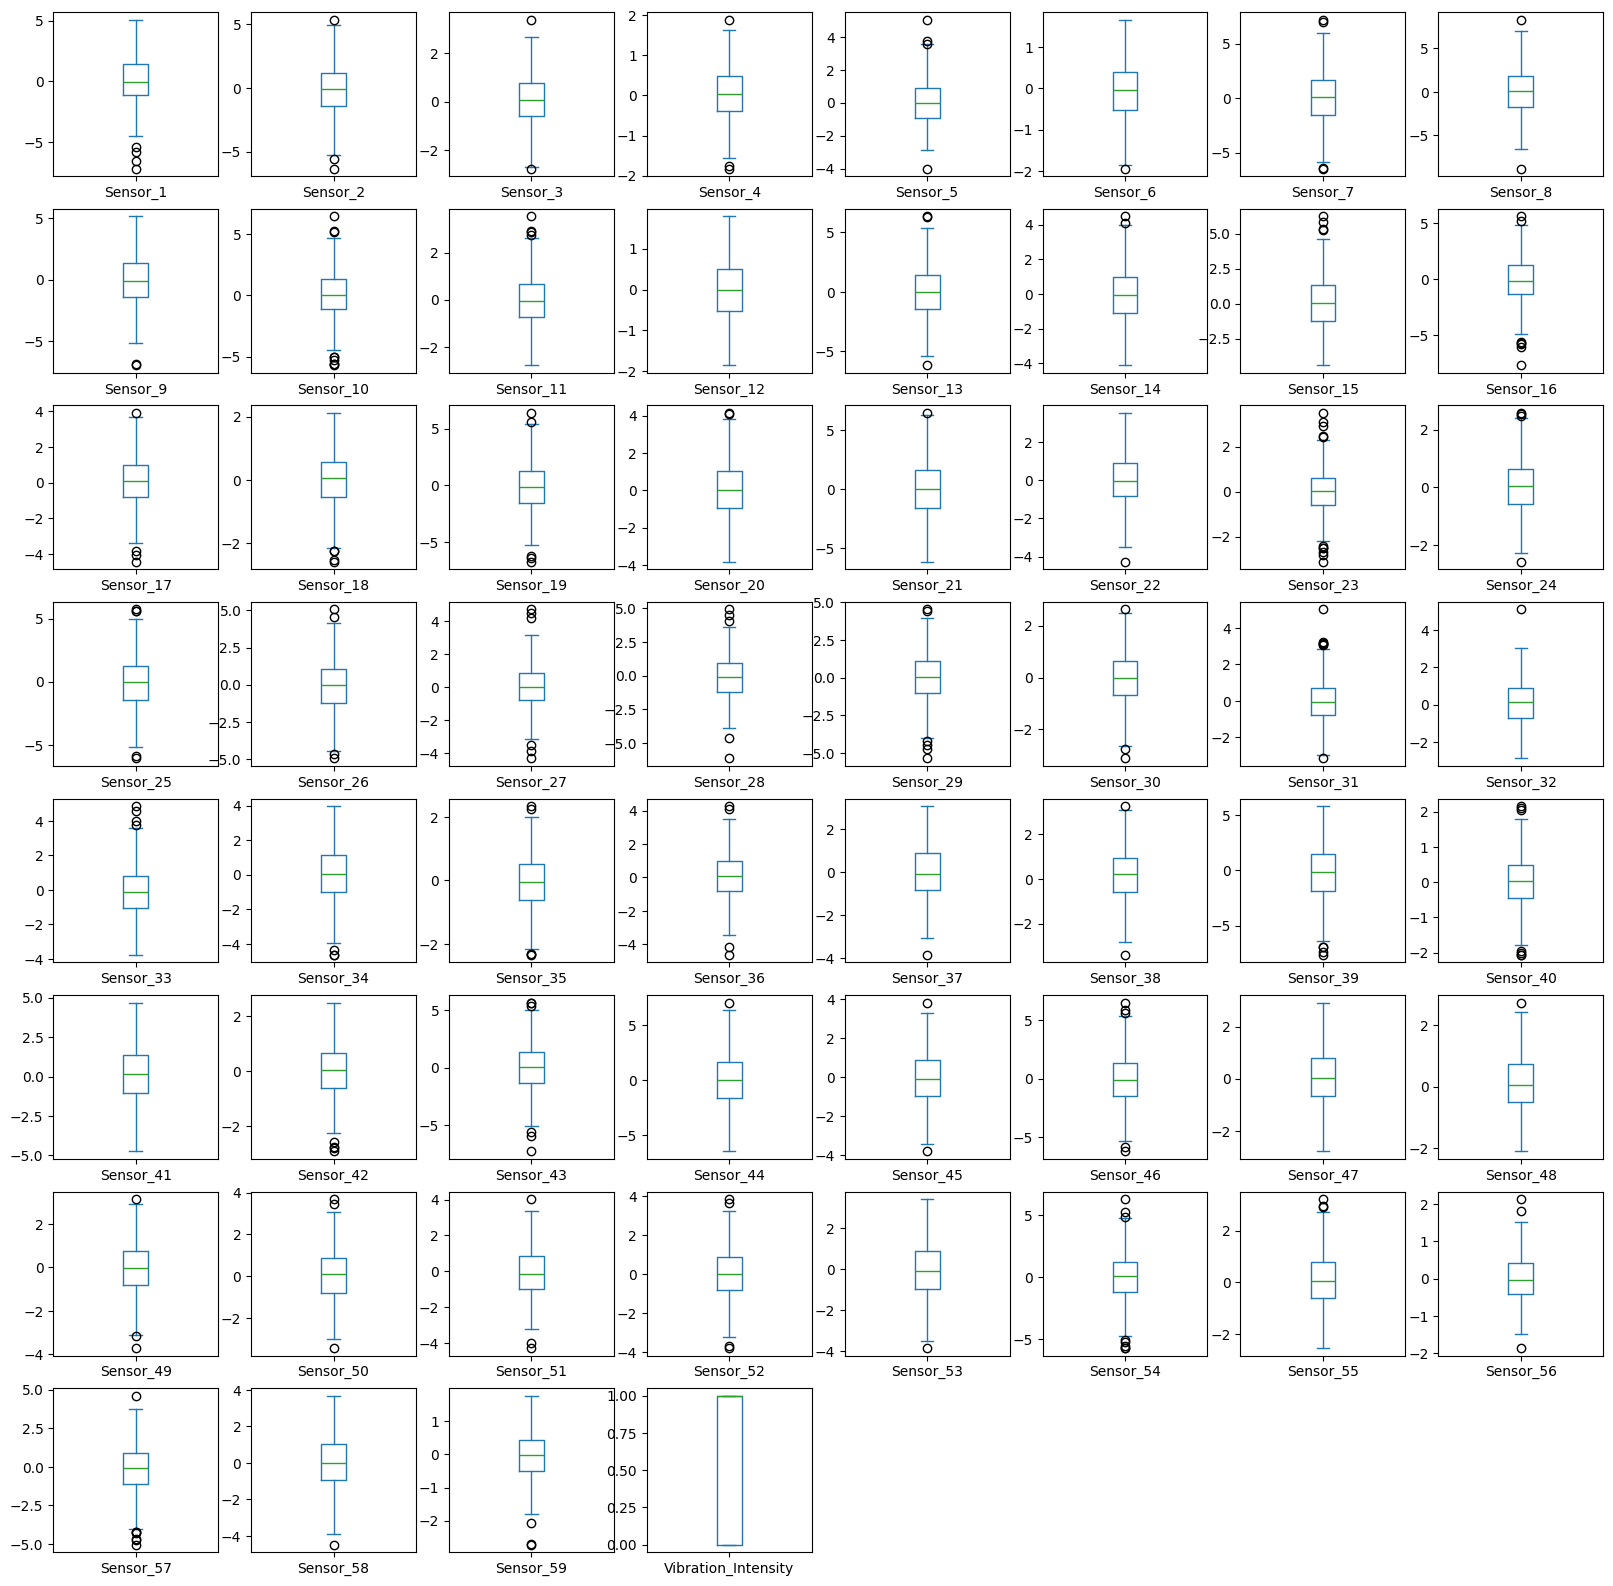

In [5]:
# Boxplot
data.plot(kind='box',subplots=True,layout=(8,8),sharex=False,figsize=(20,20),legend=False)
plt.show()

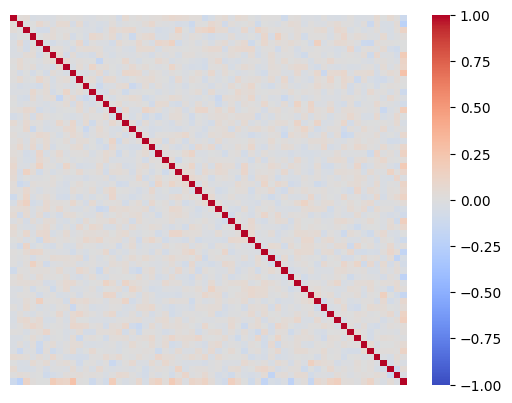

In [6]:
# Hitmap
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='coolwarm',xticklabels=False,yticklabels=False)
plt.show()

# 📋 Data Summary & Insights

After exploring the **Engine Vibration dataset**, here are some key observations:

- **🔹 Distribution:** Most of the sensor readings follow a **normal distribution**. Density plots show classic bell-shaped curves for almost all features. 🔔
- **🔹 Outliers:** There are **moderate outliers** in some features, but nothing extreme. They mimic realistic sensor noise. ⚠️  
- **🔹 Correlation:** Features are **mostly uncorrelated** (correlation ≈ 0), meaning each sensor provides fairly independent information.
- **🔹 Target Balance:** The target column (`Vibration_Intensity`) is reasonably balanced between normal (0) and dangerous (1) states.

> Overall, the dataset is clean enough for modeling, with normally distributed features, moderate outliers, and independent sensors. Perfect for testing classification algorithms!

---

---

# 🧪 Train-Test Split

To evaluate our models fairly, we will use **Train-Test Split**, which divides the dataset into **training** and **testing** sets.  
For this project, the **test size is set to 20%**, meaning 20% of the data will be used for testing and the remaining 80% for training.  

This ensures we can train our models on most of the data while keeping a portion aside to assess their performance on unseen samples.

In [7]:
# ----- Basic settings -----
random_state = 7
scoring = 'accuracy'
kfold = KFold(n_splits=10,shuffle=True,random_state=random_state)
# --------------------------
X = data.drop(columns=('Vibration_Intensity'))
Y = data['Vibration_Intensity']
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=random_state)

# ⚙️ Spot Check Base Models

In this step, we will perform a **spot check** using several **baseline machine learning models** to compare their initial performance.  
The goal is to quickly identify which algorithms are more suitable for our dataset before moving on to fine-tuning and optimization. 

Each model will be evaluated using **10-fold cross-validation** with **accuracy** as the scoring metric to ensure consistent results. 📊

---

# Unpacking Models

We will loop through all candidate models using **Python’s unpacking** syntax (`for name, model in ...`), which helps keep the code clean, organized, and easy to extend.

Name : LR , Accuracy : 86.37 % , STD : 4.48
Name : LDA , Accuracy : 84.47 % , STD : 8.78
Name : KNN , Accuracy : 67.05 % , STD : 9.83
Name : NB , Accuracy : 77.06 % , STD : 5.47
Name : CART , Accuracy : 58.78 % , STD : 7.75
Name : SVM , Accuracy : 80.89 % , STD : 5.27


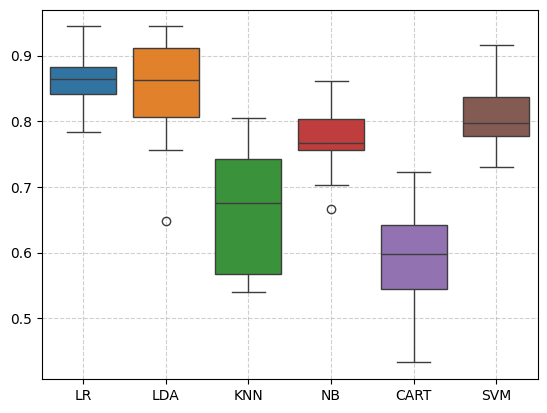

In [8]:
models = []
models.append(('LR',LogisticRegression(max_iter=1000)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
result = []
names = [] # We will use this later.
for name , model in models:
    cv_result = cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(f'Name : {name} , Accuracy : {cv_result.mean()*100:.2f} % , STD : {cv_result.std()*100:.2f}')
result_df = pd.DataFrame(result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

# 🔄 Using Pipeline with Standardization

To ensure a clean and efficient workflow, we’ll use a **Pipeline** that combines **data standardization** and **model training** in a single, seamless process. ⚙️  

Standardizing the features helps models that are sensitive to feature scales (like **SVM**, **Logistic Regression**, and **KNN**) perform more consistently.  
By wrapping both steps inside a Pipeline, we can make sure that:
- 🧩 **Data leakage** is prevented — scaling is applied only to the training set during cross-validation.  
- 🔁 **Workflow stays clean and reproducible** — the same process runs every time.  
- 🚀 **Model comparison becomes fairer** — each algorithm receives data in the same standardized form.

> In short, the Pipeline helps us build a robust and professional ML process that’s both safe and scalable.

Name : LR , Accuracy : 86.38 , STD : 4.77
Name : LDA , Accuracy : 84.47 , STD : 8.78
Name : KNN , Accuracy : 66.68 , STD : 5.31
Name : NB , Accuracy : 77.06 , STD : 5.47
Name : CART , Accuracy : 59.06 , STD : 7.79
Name : SVM , Accuracy : 83.09 , STD : 6.08


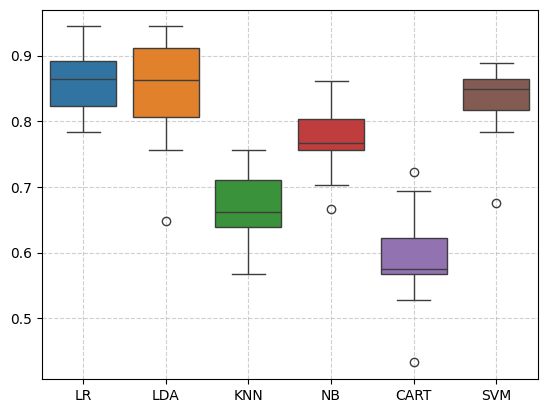

In [9]:
scaled_result = []
for name , model in models:
    pipeline = Pipeline([
        ('Scaled',StandardScaler()),
        ('Classifier',model)
    ])
    cv_result = cross_val_score(pipeline,x_train,y_train,cv=kfold,scoring=scoring)
    scaled_result.append(cv_result)
    print(f'Name : {name} , Accuracy : {cv_result.mean()*100:.2f} , STD : {cv_result.std()*100:.2f}')
result_df = pd.DataFrame(scaled_result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

# 🔧 Model Tuning Plan

In this section, we focus on **tuning our key models** to improve performance on the Engine Vibration dataset.

### 1️⃣ No Changes in Standard Pipeline
The **standard Pipeline** we set up earlier (StandardScaler + model) will remain unchanged for consistency.  
This ensures that **all models receive standardized input**, preventing data leakage and keeping the workflow clean.

### 2️⃣ No Need for Ensemble Models
Based on our previous spot check results:
- Linear models like **Logistic Regression (LR)** and **SVM** already perform very well.  
- Ensemble methods are not expected to provide a significant improvement due to the **linear nature of the dataset**.  
Thus, we skip ensembles for now to keep things simple and focused. ❌🧩

### 3️⃣ Models to Tune
We will concentrate on **tuning the following models**:

- **Logistic Regression (LR)**: Fine-tune regularization (`C`) and penalty type (`l1`, `l2`) for optimal performance.  
- **Support Vector Machine (SVM)**: Adjust kernel (`linear`, `rbf`), `C`, and `gamma` to capture subtle patterns and maximize accuracy.  

> By focusing on these two strong models, we aim to **increase accuracy while maintaining stability** and avoid unnecessary complexity.

In [10]:
param_grid = {
    'LR' : {
        'C' : [0.1,1,10],
        'penalty' : ['l1','l2'],
        'solver' : ['liblinear','saga']
    },
    'SVM' : {
        'C' : [0.1,1,10],
        'kernel' : ['rbf','linear'],
        'gamma' : ['scale','auto']
    }
}
models = [('LR', LogisticRegression(max_iter=1000)), ('SVM', SVC())]
for name , model in models:
    grid = GridSearchCV(model,param_grid[name],cv=kfold,scoring=scoring,n_jobs=-1)
    grid.fit(x_train,y_train)
    print(f'Name : {name} , {name} - Best CV Accuracy : {grid.best_score_*100:.2f} % , {name} - Best Param : {grid.best_params_}')

Name : LR , LR - Best CV Accuracy : 86.64 % , LR - Best Param : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Name : SVM , SVM - Best CV Accuracy : 86.10 % , SVM - Best Param : {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


# 🏁 Final Model Selection & Decision Overview

In our machine learning workflow, after exploring multiple models and performing hyperparameter tuning, we reached the **final model selection stage**. 🎯

---

## 🔹 What We Did Previously

- We started by defining multiple candidate models (Logistic Regression, SVM, etc.)  
- Used a **loop-based hyperparameter tuning process** to efficiently explore the best parameters for each model.  
- Compared their cross-validated accuracies and stability.  

This approach made the workflow **clean, reproducible, and scalable**, allowing us to manage multiple models without repeating code. 

---

## 🔹 Why Logistic Regression Was Chosen

After tuning, we observed:

- **Logistic Regression (LR)** achieved slightly higher accuracy and more stable results. ✅  
- **SVM** performed almost as well but with slightly lower stability and slightly more complexity.  

**Decision:** LR is selected as the **final predictive model** because it is:

- Simple and interpretable
- Stable and reliable across folds
- Perfectly suited for the linear nature of our dataset 📈

---

## 🔹 Why SVM Was Excluded

- Marginal accuracy gain did not justify added complexity
- LR already provided strong performance  
- Maintaining simplicity and clarity in the pipeline was a priority 🛠️  

---

## 🔹 Why VotingClassifier Was Not Used

- Combining LR + SVM would increase complexity without meaningful benefit 
- Our dataset is **linear and well-behaved**, so a single LR model suffices 
- Keeps the workflow **easy to maintain and explain**  

---

### ✅ Summary

By choosing **Logistic Regression**:

- We maintain a **clean, efficient, and reproducible workflow**  
- Avoid unnecessary complexity from ensembles  
- Ensure **strong, stable predictions** for the final dataset  

This setup is ready for the **prediction stage** with confidence. 🎉

In [13]:
lr_pipe = Pipeline([
    ('Scaled',StandardScaler()),
    ('Classifier',LogisticRegression(max_iter=1000,C=1,penalty='l2',solver='liblinear'))
])
lr_pipe.fit(x_train,y_train)
predection = lr_pipe.predict(x_test)
print(f'Test Accuracy : {accuracy_score(y_test,predection)*100:.2f} %')
print('\n Confusion Matrix : \n',confusion_matrix(y_test,predection))
print('\n Classification Report : \n',classification_report(y_test,predection))

Test Accuracy : 80.43 %

 Confusion Matrix : 
 [[38 10]
 [ 8 36]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        48
           1       0.78      0.82      0.80        44

    accuracy                           0.80        92
   macro avg       0.80      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



#  Final Model Summary

The tuned Logistic Regression model reached an accuracy of **80.43%** on the test set.  
Its precision and recall values show that the model performs consistently across both classes and maintains a balanced behavior.  

Overall, the model generalizes well, and the tuning process successfully improved its stability without overfitting. Logistic Regression was selected as the final model due to its stronger and more reliable performance compared to the other candidates.